In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8710 - loss: 0.4502 - val_accuracy: 0.9568 - val_loss: 0.1446
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9661 - loss: 0.1113 - val_accuracy: 0.9657 - val_loss: 0.1080
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9774 - loss: 0.0736 - val_accuracy: 0.9712 - val_loss: 0.0900
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9833 - loss: 0.0542 - val_accuracy: 0.9714 - val_loss: 0.1006
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9852 - loss: 0.0457 - val_accuracy: 0.9700 - val_loss: 0.1141
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9661 - loss: 0.1204
Test Accuracy: 96.94%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


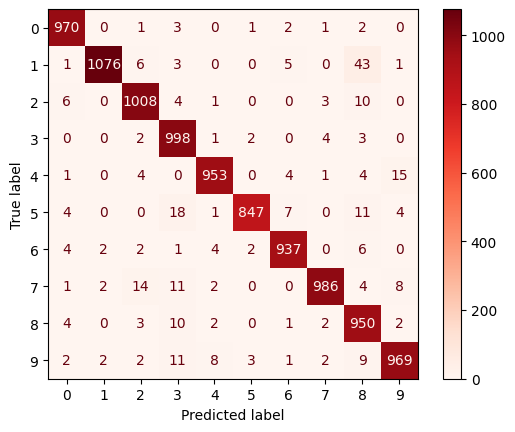

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [16]:
num_classes = cm.shape[0]

for i in range(num_classes):
    VP = cm[i, i]
    FP = cm[:, i].sum() - VP
    FN = cm[i, :].sum() - VP
    VN = cm.sum() - (VP + FP + FN)

    print(f"Class {i}")
    print("")
    print(f"True Positives: {VP}")
    print(f"False Positives: {FP}")
    print(f"False Negatives: {FN}")
    print(f"True Negatives: {VN}")
    print("")

    sensitivity = VP / (VP + FN)
    specificity = VN / (FP + VN)
    accuracy = (VP + VN) / cm.sum()
    precision = VP / (VP + FP)
    f_score = 2 * (precision * sensitivity) / (precision + sensitivity)

    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F-score: {f_score:.4f}")
    print("----------------------------")



Class 0

True Positives: 970
False Positives: 23
False Negatives: 10
True Negatives: 8997

Sensitivity: 0.9898
Specificity: 0.9975
Accuracy: 0.9967
Precision: 0.9768
F-score: 0.9833
----------------------------
Class 1

True Positives: 1076
False Positives: 6
False Negatives: 59
True Negatives: 8859

Sensitivity: 0.9480
Specificity: 0.9993
Accuracy: 0.9935
Precision: 0.9945
F-score: 0.9707
----------------------------
Class 2

True Positives: 1008
False Positives: 34
False Negatives: 24
True Negatives: 8934

Sensitivity: 0.9767
Specificity: 0.9962
Accuracy: 0.9942
Precision: 0.9674
F-score: 0.9720
----------------------------
Class 3

True Positives: 998
False Positives: 61
False Negatives: 12
True Negatives: 8929

Sensitivity: 0.9881
Specificity: 0.9932
Accuracy: 0.9927
Precision: 0.9424
F-score: 0.9647
----------------------------
Class 4

True Positives: 953
False Positives: 19
False Negatives: 29
True Negatives: 8999

Sensitivity: 0.9705
Specificity: 0.9979
Accuracy: 0.9952
Precisi